# Лабораторная работа №4

Ананикян Тигран ИУ10-56, Вариант - 1

База данных - https://www.kaggle.com/datasets/aemyjutt/laptop-price-analysis/

## Метрические методы классификации

### Цель работы
- Изучение принципов построения информационных систем с использованием метрических методов классификации.

### Задачи
- изучение инструментария Python для реализации алгоритмов метрической классификации;
- изучение методов оптимизации параметров метрической классификации;
- освоение модификаций kNN-метода.

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
data_source = "./laptops_train.csv"
data = pd.read_csv(data_source, 
                   delimiter=',', 
                   names=['Manufacturer', 'Model Name','Category', 
                          'Screen Size', 'Screen', 'CPU', 'RAM',
                          'Storage', 'GPU', 'Operating System', 'Operating System Version', 'Weight', 'Price'],
                   header=None)
data.head(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
1,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
2,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
3,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900
4,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.4
5,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.2
6,Acer,Aspire 3,Notebook,"15.6""",1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800
7,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,X,2.04kg,19028613.24
8,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,10303160.4
9,Asus,ZenBook UX430UN,Ultrabook,"14.0""",Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Чтение данных из файла
data_source = "./laptops_train.csv"
data = pd.read_csv(data_source)

# Преобразование категориальных признаков в числовые, например, с использованием one-hot encoding
data_encoded = pd.get_dummies(data, columns = ['Manufacturer', 'Model Name','Category', 
                          'Screen Size', 'Screen', 'CPU', 'RAM',
                          'Storage', 'GPU', 'Operating System', 'Operating System Version', 'Weight', 'Price'])

# Разделение данных
X = data_encoded.drop('Category_Ultrabook', axis=1)
y = data_encoded['Category_Ultrabook']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели k-ближайших соседей
def build_knn_classifier(X_train, y_train, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# Предсказание и оценка точности
k_value = int(input("Введите количество ближайших соседей (K): "))

knn_classifier = build_knn_classifier(X_train, y_train, k_value)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Введите количество ближайших соседей (K):  5


Точность модели: 0.97


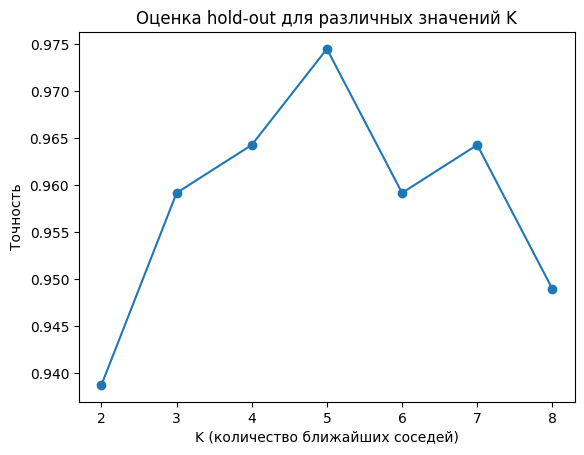

In [63]:
import matplotlib.pyplot as plt

def evaluate_holdout(X_train, y_train, X_test, y_test, k_values):
    accuracies = []

    for k in k_values:
        knn_classifier = build_knn_classifier(X_train, y_train, k)
        y_pred = knn_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return accuracies

k_values = list(range(2, 9))

holdout_accuracies = evaluate_holdout(X_train, y_train, X_test, y_test, k_values)

plt.plot(k_values, holdout_accuracies, marker='o')
plt.title('Оценка hold-out для различных значений K')
plt.xlabel('K (количество ближайших соседей)')
plt.ylabel('Точность')
plt.show()

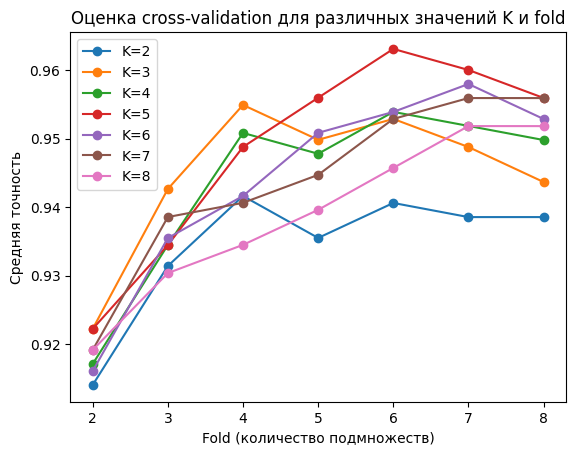


Оптимальное значение K на основе hold-out: 5
Оптимальные значения K на основе cross-validation:
Для K=2, оптимальное значение fold: 4
Для K=3, оптимальное значение fold: 4
Для K=4, оптимальное значение fold: 6
Для K=5, оптимальное значение fold: 6
Для K=6, оптимальное значение fold: 7
Для K=7, оптимальное значение fold: 7
Для K=8, оптимальное значение fold: 7

Наилучшее значение K: 5

Точность модели с использованием наилучшего значения K: 0.97


In [64]:
from sklearn.model_selection import cross_val_score

def evaluate_cross_validation(X, y, k_values, fold_values):
    results = {}

    for k in k_values:
        k_results = []
        for fold in fold_values:
            knn_classifier = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn_classifier, X, y, cv=fold)
            k_results.append(scores.mean())

        results[k] = k_results

    return results

fold_values = list(range(2, 9))

cross_validation_results = evaluate_cross_validation(X, y, k_values, fold_values)

for k, results in cross_validation_results.items():
    plt.plot(fold_values, results, label=f'K={k}', marker='o')

plt.title('Оценка cross-validation для различных значений K и fold')
plt.xlabel('Fold (количество подмножеств)')
plt.ylabel('Средняя точность')
plt.legend()
plt.show()

optimal_k_holdout = fold_values[holdout_accuracies.index(max(holdout_accuracies))]
print(f"\nОптимальное значение K на основе hold-out: {optimal_k_holdout}")

optimal_k_values = {}
for k, results in cross_validation_results.items():
    optimal_k_values[k] = fold_values[results.index(max(results))]

print("Оптимальные значения K на основе cross-validation:")
for k, optimal_k in optimal_k_values.items():
    print(f"Для K={k}, оптимальное значение fold: {optimal_k}")

best_k = max(optimal_k_values, key=lambda k: cross_validation_results[k][fold_values.index(optimal_k_values[k])])

print(f"\nНаилучшее значение K: {best_k}")

best_knn_classifier = build_knn_classifier(X_train, y_train, best_k)

y_pred_best_k = best_knn_classifier.predict(X_test)

accuracy_best_k = accuracy_score(y_test, y_pred_best_k)
print(f"\nТочность модели с использованием наилучшего значения K: {accuracy_best_k:.2f}")

## Контрольные вопросы

### Особенности методов метрической классификации:
- Метод ближайшего соседа (1NN): Классификация объекта основывается на классе его ближайшего соседа.
- Метод k ближайших соседей (kNN): Классификация объекта определяется большинством классов k ближайших соседей.

### Принципы и этапы реализации метода kNN:
- Принцип: Определение класса объекта основывается на классе его соседей.
- Этапы:
    Задание количества соседей (K).
    Вычисление расстояний между объектом и всеми точками обучающей выборки.
    Выбор K ближайших соседей.
    Определение класса объекта на основе большинства классов среди соседей.
    
### Выбор количества соседей:
- Количество соседей выбирается эмпирическим путем или с использованием методов оценки качества, таких как hold-out или кросс-валидация.

### Метод парзеновского окна:
- Это обобщение метода kNN, где вес каждого соседа зависит от расстояния до объекта. Чем дальше сосед, тем меньше его вес.

### Параметры для оптимизации в методах kNN:
- k (количество соседей): Оптимизируется для достижения наилучшей производительности.
- Метрика расстояния: Выбор метрики (евклидово расстояние, манхэттенское расстояние и т.д.) может влиять на результаты.